In [0]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np 

In [2]:
tokenizer = Tokenizer()
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt
data = open('/tmp/sonnets.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

--2019-06-13 09:37:41--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.97.128, 2404:6800:4008:c00::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.97.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘/tmp/sonnets.txt’

/tmp/sonnets.txt    100%[===================>]  91.38K  --.-KB/s    in 0.002s  

2019-06-13 09:37:42 (39.8 MB/s) - ‘/tmp/sonnets.txt’ saved [93578/93578]



In [3]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences = True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 100)           321100    
_________________________________________________________________
bidirectional (Bidirectional (None, 10, 300)           301200    
_________________________________________________________________
dropout (Dropout)            (None, 10, 300)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense (Dense)                (None, 1605)              162105    
_________________________________________________________________
dense_1 (Dense)      

In [4]:
 history = model.fit(predictors, label, epochs=100, verbose=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
15462/15462 [==============================] - 49s 3ms/sample - loss: 6.9012 - acc: 0.0205
Epoch 2/100
15462/15462 [==============================] - 47s 3ms/sample - loss: 6.4990 - acc: 0.0217
Epoch 3/100
15462/15462 [==============================] - 46s 3ms/sample - loss: 6.3791 - acc: 0.0251
Epoch 4/100
15462/15462 [==============================] - 46s 3ms/sample - loss: 6.2607 - acc: 0.0309
Epoch 5/100
15462/15462 [==============================] - 46s 3ms/sample - loss: 6.1777 - acc: 0.0346
Epoch 6/100
15462/15462 [==============================] - 46s 3ms/sample - loss: 6.0981 - acc: 0.0382
Epoch 7/100
15462/15462 [==============================] - 46s 3ms/sample - loss: 6.0184 - acc: 0.0402
Epoch 8/100
15462/15462 [==============================] - 46s 3ms/sample - loss: 5.9330 - acc: 0.0400
Epoch 9/100
15462/15462 [==============================] - 46s 3ms/sample - loss: 5.8382 - acc: 0.0501
Epoch 10/100
15462/15462 

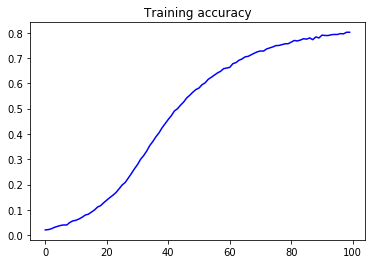

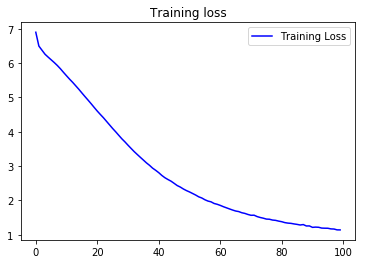

In [6]:
import matplotlib.pyplot as plt
acc = history.history['acc']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [5]:
seed_text = "I find your lack of faith disturbing" #"Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

I find your lack of faith disturbing not you is dispense shown pride do none live bright bright bad grace wanting life of amiss prove thee after heart ' die open minds of men still bad still must lend thee thee to keep so now now spend told sorrow store they look up known thrust warm'd grow up view had buried friend shall store so minds in to die day do spend prove care 'tis held madmen's now be conspire others' remain acquainted appear more nearly knit quite gone still say she was she was she must be muse thee doth thee none dost long cold hence
